<a href="https://colab.research.google.com/github/Nathanielkm/CodeAlpha_Project_Name/blob/main/Stockprediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install yfinance scikit-learn tensorflow

In [ ]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Dense

In [ ]:
# Download stock data
stock_data = "TSLA"

df= yf.download("TSLA", start="2020-01-01", end="2021-01-01")# this show the parameters we are using for the start and end date of historical data
# shows the first five rows
df.head()

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,TSLA,TSLA,TSLA,TSLA,TSLA
Date,,,,,
2020-01-02,28.684000,28.713333,28.114000,28.299999,142981500
2020-01-03,29.534000,30.266666,29.128000,29.366667,266677500
2020-01-06,30.102667,30.104000,29.333332,29.364668,151995000
2020-01-07,31.270666,31.441999,30.224001,30.760000,268231500
2020-01-08,32.809334,33.232666,31.215334,31.580000,467164500


In [ ]:
# 1. Download stock data
stock_symbol = "TSLA"  # You can change this to any valid ticker symbol
df = yf.download(stock_symbol, start="2015-01-01", end="2024-01-01")
print("Data Shape: ", df.shape)
df.head()

# 2. Normalize the "Close" prices
scaler = MinMaxScaler(feature_range=(0,1))
close_prices = df['Close'].values.reshape(-1,1)
df_scaled = scaler.fit_transform(close_prices)

# 3. Split the data (80% train, 20% test)
train_size = int(len(df_scaled) * 0.8)
train_data = df_scaled[:train_size]
test_data = df_scaled[train_size:]

# 4. Create sequences for the LSTM
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i : i + seq_length])
        y.append(data[i + seq_length])
    return np.array(X), np.array(y)

sequence_length = 60  # Use 60 days to predict the next day
X_train, y_train = create_sequences(train_data, sequence_length)
X_test, y_test = create_sequences(test_data, sequence_length)

# 5. Reshape the data for the LSTM (samples, timesteps, features)
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# Check shapes
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

[*********************100%***********************]  1 of 1 completed

Data Shape:  (2264, 5)
X_train shape: (1751, 60, 1)
y_train shape: (1751, 1)
X_test shape: (393, 60, 1)
y_test shape: (393, 1)


In [ ]:
# Build the LSTM model
model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(60, 1)),
    Dropout(0.2),
    LSTM(50, return_sequences=False),
    Dropout(0.2),
    Dense(25),
    Dense(1)
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32)

Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 37ms/step - loss: 0.0217
Epoch 2/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 46ms/step - loss: 0.0021
Epoch 3/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0016
Epoch 4/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0013
Epoch 5/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 0.0013
Epoch 6/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - loss: 0.0011
Epoch 7/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 39ms/step - loss: 0.0013
Epoch 8/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 0.0014
Epoch 9/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.0013
Epoch 10/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - loss: 0.0010
Epoch 11/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 45ms/step - loss: 0.0011
Epoch 12/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 9.9696e-04
Epoch 13/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 9.7487e-04
Epoch 14/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 8.3116e-04
Epoch 15/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - loss: 0.0011
Epo

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


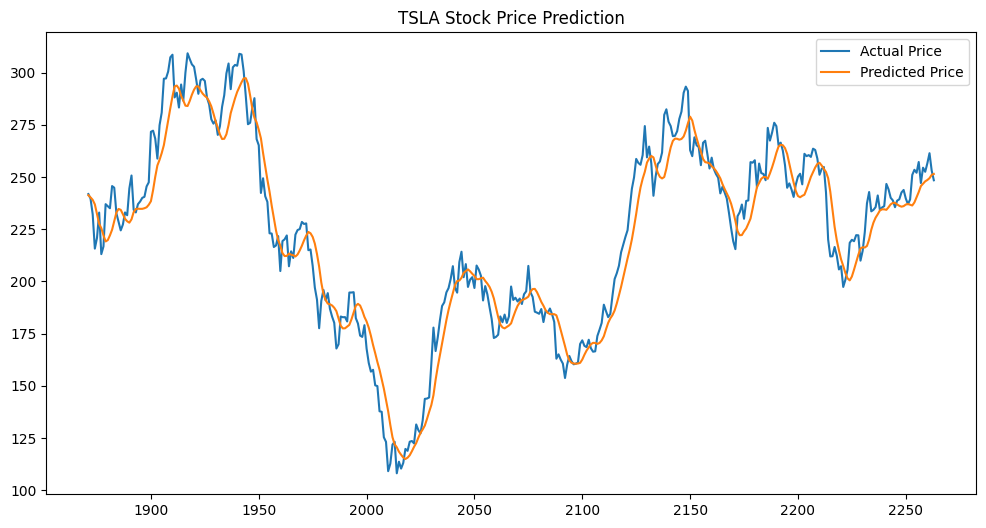

In [ ]:
import matplotlib.pyplot as plt

# Get the train_size and sequence_length from previous steps
train_size = int(len(df_scaled) * 0.8)
sequence_length = 60

# Calculate the starting index for plotting based on the sequence_length
test_start_index = train_size + sequence_length

# Predict prices
predicted_prices = model.predict(X_test)
predicted_prices = scaler.inverse_transform(predicted_prices)
# Reshape predicted prices to 1D for plotting
predicted_prices = predicted_prices.flatten()

# Ensure index alignment
df = df.reset_index()  # Reset index if needed

# Plot actual vs predicted prices
plt.figure(figsize=(12,6))
plt.plot(df.index[test_start_index:], df['Close'].values[test_start_index:], label="Actual Price")
plt.plot(df.index[test_start_index:], predicted_prices, label="Predicted Price")
plt.legend()
plt.title(f"{stock_symbol} Stock Price Prediction")
plt.show()

In [ ]:
sequence_length = 60
last_60_days = df_scaled[-sequence_length:]
last_60_days = np.reshape(last_60_days, (1, sequence_length, 1))

next_day_price = model.predict(last_60_days)
next_day_price = scaler.inverse_transform(next_day_price)

print(f"Predicted Price for Next Day: ${next_day_price[0][0]:.2f}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 241ms/step
Predicted Price for Next Day: $250.61
